<a href="https://colab.research.google.com/github/romulo-souza/Data_Mining/blob/main/PreProcessamento/AEDePreProcessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratória de Dados (AED)
É uma metodologia para descrever, simplificar ou sumarizar as principais características de uma base de dados.

Propicia uma visão geral dos dados, por meio do emprego de técnicas que permitem a detecção de comportamentos relacionados ao contexto estudado e a obtenção de informações sobre os dados não facilmente perceptíveis ao olhar humano.

Com isso, após um entendimento acerca da visão de negócio, passa a ser possível extrair insights da base de dados.

### Entendimento do caso de estudo

Para colocar em prática algumas técnicas de AED, foi adotada uma base de dados, armazenada em um arquivo Excel (caso_estudo.xlsx).

A base é formada por vários conjuntos de dados (planilhas), cujo contexto precisa ser entendido.

Resumidamente, trata-se de uma empresa com uma rede de lojas, com uma vasta base de clientes, inúmeros registros de vendas de seus produtos realizadas aos seus clientes, bem como informações acerca dos pagamentos recebidos pelas vendas realizadas.

link da base de dados: https://docs.google.com/spreadsheets/d/1O3B0w9s_0fvoY99rcSFanpv3OSOLuFuX/edit?usp=sharing&ouid=108494607560974181972&rtpof=true&sd=true

### Leitura da base de dados

In [ ]:
# importação da biblioteca para analisar e manipular dados
import pandas as pd

In [ ]:
# criar os DataFrames para ler os dados de cada planilha (conjunto de dados)
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPag = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

### Análise preliminar

In [ ]:
# visualização de linhas e colunas do DataFrame de clientes
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [ ]:
# visualização resumida da estrutura do DataFrame de pagamentos
dfPag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        2072 non-null   int64         
 1   id_venda  2072 non-null   int64         
 2   dt_pgto   2072 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 48.7 KB


### Valores ausentes (nulos)

In [ ]:
# verifica se tem algum valor nulo no DataFrame de Clientes
dfClientes.isnull().values.any() #.values converte o DataFrame para uma matriz/array bidimensional (sem rotulos de indice e colunas), .any() verifica se existe pelo menos um valor True nesse array

np.True_

In [ ]:
# retorna o total de valores nulos (se houver) no DataFrame
dfClientes.isnull().sum()

,0
id,0
nome,4
sexo,4
dt_nasc,4


In [ ]:
# em quais linhas estão os valores nulos identificados?
# [] cria um filtro do DataFrame para o caso de haver algum valor nulo
dfClientes[dfClientes.isnull().any(axis=1)] # axis=1 é o eixo das linhas (percorre coluna por coluna)

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [ ]:
# retorna as linhas referentes a uma coluna específica, caso ela tenha valor nulo
dfClientes[dfClientes['nome'].isnull()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN


### Verificando possíveis ruídos

In [ ]:
# verificando e analisando a base de produtos
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<Axes: >

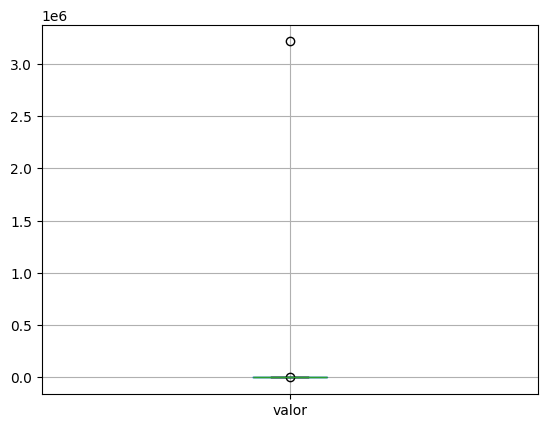

In [ ]:
# visualização da distribuição dos dados da coluna "valor"
dfProdutos.boxplot(column=['valor'])

# o Boxplot gerado mostra que o valor de um produto que parece não fazer parte do conjunto de dados, mostrado pela elipse do limite superior


<Axes: >

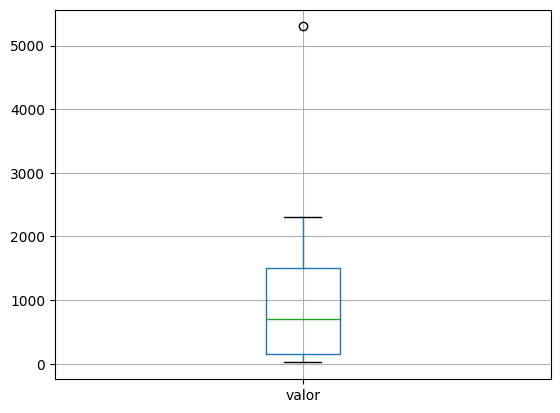

In [ ]:
# gera um boxplot sem o valor que parece ser um outlier
dfProdutos[(dfProdutos['valor'] < 3000000)].boxplot(column=['valor'])

In [ ]:
# sobre o produto, cujo valor parece ser um outlier, deletá-lo pode não ser a
# melhor opção, pois ele pode ter sido vendido para vários clientes
dfVendas[dfVendas["id_produto"] == 10]

,id,id_cliente,id_loja,id_produto,dt_venda
7,8,543,10,10,2018-01-06
9,10,724,3,10,2018-01-07
20,21,270,2,10,2018-01-12
22,23,665,10,10,2018-01-12
28,29,299,5,10,2018-01-13
...,...,...,...,...,...
2906,2907,907,2,10,2020-08-23
2946,2947,387,3,10,2020-09-10
2956,2957,35,7,10,2020-09-14
2966,2967,405,3,10,2020-09-17


In [ ]:
# foram retornadas várias vendas do produto que parecer ser um outlier
# Quantas?
dfVendas[dfVendas['id_produto'] == 10].count()

,0
id,182
id_cliente,182
id_loja,182
id_produto,182
dt_venda,182


In [ ]:
#informações acerca do DataFrame de Vendas
dfVendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          3000 non-null   int64         
 1   id_cliente  3000 non-null   int64         
 2   id_loja     3000 non-null   int64         
 3   id_produto  3000 non-null   int64         
 4   dt_venda    3000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 117.3 KB


###Imputação de valores ausentes

In [ ]:
# são poucos os clientes que possuem valores ausentes, mas vendas podem ter sido
# realizadas a eles. Dessa forma, não é recomendado excluir esses clientes.
# Assim, é necessário descobrir se foram realizadas vendas para esses clientes.
dfVendas[dfVendas.id_cliente == 264] #variar o id_cliente que possuem valores nulos verificados anteriormente

,id,id_cliente,id_loja,id_produto,dt_venda
229,230,264,2,3,2018-03-28
562,563,264,5,3,2018-07-07
1438,1439,264,3,3,2019-04-29
2021,2022,264,6,3,2019-11-08
2877,2878,264,10,3,2020-08-14


In [ ]:
# subtituir os valores ausentes (colunas nome, sexo e dt_nasc). Usar o .loc[<condição>, 'coluna'] -> acessador de rótulo do pandas. É usado para acessar ou modificar linhas e colunas de um DataFrame usando os rótulos (nomes) ao invés de índices numéricos
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'sem nome' # .loc está selecionando as linhas onde a condição (dfClientes.nome.isnull()) for true e, dentro dessas linhas, está acessando especificamente a coluna 'nome'
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2025'

In [ ]:
# verificar se as substituições foram realizadas
dfClientes.loc[[263, 264, 268, 269, 287], :] # [] -> acessam-se as linhas pelo seu índice no DataFrame (não é o id do cliente). : -> exibe os valores de todas as colunas


,id,nome,sexo,dt_nasc
263,264,sem nome,F,7/29/1997
264,265,sem nome,M,2/7/1979
268,269,sem nome,F,1/1/2025
269,270,sem nome,M,1/1/2025
287,288,Victor Ribeiro,O,12/17/1974


In [ ]:
# verificar se ainda existem valores ausentes
dfClientes.isnull().sum()

,0
id,0
nome,0
sexo,0
dt_nasc,0


## Suavização de outliers

In [ ]:
#durante a AED, foi detectado um possível outlier na tabela Produtos
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [ ]:
# Deletar o produto pode não ser a ação mais correta, pois o produto
# foi vendido várias vezes. O ideal seria consultar um especialista, o que
# não é o caso aqui. Dessa forma, podemos considerar que o valor foi digitado
# incorretamente. Assim, vamos assumir que o erro se deu em 4 casas decimais,
# o que nos leva a ter que dividir o seu valor por 10000
dfProdutos.loc[9,'valor'] = dfProdutos.loc[9,'valor']/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


## Transformação do formato de dados

In [ ]:
# verificar se a data de nascimento de cliente está em formato adequado
# percebe-se que essa coluna (dt_nasc) está no formato do tipo string (Dtype object)
dfClientes.info()
dfClientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1000 non-null   int64 
 1   nome     1000 non-null   object
 2   sexo     1000 non-null   object
 3   dt_nasc  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [ ]:
# transformar o formato de data para o tipo datetime (Ano/Mês/Dia)
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y') # função pd.todatetime() -> passa-se o atributo ao qual será atualizado o formato, e o formato atual que se encontra esse atributo

In [ ]:
dfClientes.info()
dfClientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       1000 non-null   int64         
 1   nome     1000 non-null   object        
 2   sexo     1000 non-null   object        
 3   dt_nasc  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 31.4+ KB


,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20
